# Bootstrap Regression - Propensity

## Importing Files

In [1]:
import pandas as pd
import numpy as np

In [2]:
propensity = pd.read_excel('Propensity.xlsx')

In [3]:
excel_file_path = 'Annual_simplified.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [4]:
print("Worksheet names:", list(all_dfs.keys()))

Worksheet names: ['Fees', 'Fees_Merged', 'Fees_Non_Merged', 'Financial_Performance', 'Financial_Merged', 'Financial_Non_Merged', 'Fund_Profile', 'Fund_Profile_Merged', 'Fund_Profile_Non_Merged']


In [5]:
Financial_Merged = all_dfs['Financial_Merged']
Financial_Non_Merged = all_dfs['Financial_Non_Merged']
Fund_Profile_Merged = all_dfs['Fund_Profile_Merged']
Fund_Profile_Non_Merged = all_dfs['Fund_Profile_Non_Merged'] 

In [6]:
# Merge Financial dataframes
merged_financial = pd.concat([Financial_Merged, Financial_Non_Merged], ignore_index=True)

# Merge Fund Profile dataframes
merged_fund_profile = pd.concat([Fund_Profile_Merged, Fund_Profile_Non_Merged], ignore_index=True)

# Fill NaN values in the columns 'Merger', 'Merged', and 'Acquirer' with 0
merged_financial[['Merger', 'Merged', 'Acquirer']] = merged_financial[['Merger', 'Merged', 'Acquirer']].fillna(0)

merged_fund_profile[['Merger', 'Merged', 'Acquirer']] = merged_fund_profile[['Merger', 'Merged', 'Acquirer']].fillna(0)


In [7]:
merged_financial = merged_financial[['Period', 'Fund name', 'ABN', 'Merger', 'Merged', 'Acquirer', 'Fund type', 'NtOuRt', '1YrRet']]

merged_fund_profile = merged_fund_profile[['Period', 'Fund name', 'ABN', 'Merger', 'Merged', 'Acquirer', 'Fund type', 'TtlAst']]

In [8]:
merged_fund_profile

,Period,Fund name,ABN,Merger,Merged,Acquirer,Fund type,TtlAst
0,2022-06-30,Australian Retirement Trust,60905115063,1.0,0.0,0,Industry,247360562
1,2021-06-30,equipsuper,33813823017,1.0,0.0,0,Industry,33898889
2,2019-06-30,Smart Future Trust,68964712340,1.0,0.0,0,Retail,5415697
3,2019-06-30,Russell Investments Master Trust,89384753567,1.0,0.0,0,Retail,9483982
4,2019-06-30,NGS Super,73549180515,1.0,0.0,0,Industry,11655150
...,...,...,...,...,...,...,...,...
1496,2014-06-30,Wealth Personal Superannuation and Pension Fund,92381911598,0.0,0.0,0,Retail,21922794
1497,2014-06-30,Westpac Mastertrust - Superannuation Division,81236903448,0.0,0.0,0,Retail,5787189
1498,2014-06-30,Westpac Personal Superannuation Fund,36369876939,0.0,0.0,0,Retail,0
1499,2014-06-30,Worsley Alumina Superannuation Fund,51469547458,0.0,0.0,0,Retail,282182


Merging all dataframes

In [10]:
# Define the columns to merge on
merge_columns = ['Period', 'Fund name', 'ABN', 'Merger', 'Merged']

# Merge propensity with merged_financial
propensity_merged = propensity.merge(
    merged_financial, 
    on=merge_columns, 
    how='inner'
)

# Merge merged_fund_profile with merged_financial
profile_merged = merged_fund_profile.merge(
    merged_financial, 
    on=merge_columns, 
    how='inner'
)

# Merge the results of the two previous merges
final_merged_result = propensity_merged.merge(
    profile_merged, 
    on=merge_columns, 
    how='inner'
)

In [11]:
final_merged_result.columns

Index(['Period', 'Fund name', 'ABN', '<25%', '25 to 34%', '35 to 44%',
       '45 to 49%', '50 to 54%', '55 to 59%', '60 to 64%', '65 to 69%',
       '70 to 74%', '75 to 84%', '85+%', '<$1,000%', '$1,000 to $24,999%',
       '$25,000 to $49,000%', '$50,000 to $99,999%', '$100,000 to $199,999%',
       '$200,000 to $499,999%', '$500,000 to $999,999%', '$1,000,000+%',
       'Proportion of investments in cash',
       'Proportion of investments in  fixed income',
       'Proportion of investments in equity',
       'Proportion of investments in property',
       'Proportion of investments in infrastructure',
       'Proportion of investments in commodities',
       'Proportion of investments in other', 'Merger', 'Merged',
       'Acquirer_x_x', 'Acquirer_y_x', 'Fund type', 'NtOuRt_x', '1YrRet_x',
       'Acquirer_x_y', 'Fund type_x', 'TtlAst', 'Acquirer_y_y', 'Fund type_y',
       'NtOuRt_y', '1YrRet_y'],
      dtype='object')

In [24]:
rename_dict = {
    '1YrRet_x': '1YrRet',
    # Add other columns you want to rename similarly here
}

# Rename the columns
final_merged_result = final_merged_result.rename(columns=rename_dict)

In [12]:
# List of desired columns in the specified order
desired_columns = [
    'Period', 'Fund name', 'ABN', 'Merger', 'Merged', 'Acquirer_x_x', 'Fund type', 
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%', 
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%', '<$1,000%', 
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%', 
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%', 
    '$1,000,000+%', 'Proportion of investments in cash', 
    'Proportion of investments in  fixed income', 
    'Proportion of investments in equity', 
    'Proportion of investments in property', 
    'Proportion of investments in infrastructure', 
    'Proportion of investments in commodities','Proportion of investments in other', 'NtOuRt_x', '1YrRet_x', 'TtlAst'
]

# Subset the dataframe
final_df = final_merged_result[desired_columns]

In [13]:
rename_columns = {
    'Acquirer_x_x': 'Acquirer',
    'NtOuRt_x': 'NtOuRt',
    '1YrRet_x': '1YrRet',
    '<25%': '25',
    '25 to 34%': '34',
    '35 to 44%': '44',
    '45 to 49%': '49',
    '50 to 54%': '54',
    '55 to 59%': '59',
    '60 to 64%': '64',
    '65 to 69%': '69',
    '70 to 74%': '74',
    '75 to 84%': '84',
    '85+%': '85%',
    '<$1,000%': '1000',
    '$1,000 to $24,999%': '24999',
    '$25,000 to $49,000%': '49000',
    '$50,000 to $99,999%': '99999',
    '$100,000 to $199,999%': '199999',
    '$200,000 to $499,999%': '499999',
    '$500,000 to $999,999%': '999999',
    '$1,000,000+%': '1000000',
    'Proportion of investments in cash': 'cash',
    'Proportion of investments in  fixed income': 'fi',
    'Proportion of investments in equity': 'equity',
    'Proportion of investments in property': 'prop',
    'Proportion of investments in infrastructure': 'infra',
    'Proportion of investments in commodities': 'comm',
    'Proportion of investments in other': 'Other'
}

# Rename the columns
final_df = final_df.rename(columns=rename_columns)

In [14]:
final_df['Period'] = pd.to_datetime(final_df['Period']).dt.year

In [15]:
final_df.columns

Index(['Period', 'Fund name', 'ABN', 'Merger', 'Merged', 'Acquirer',
       'Fund type', '25', '34', '44', '49', '54', '59', '64', '69', '74', '84',
       '85%', '1000', '24999', '49000', '99999', '199999', '499999', '999999',
       '1000000', 'cash', 'fi', 'equity', 'prop', 'infra', 'comm', 'Other',
       'NtOuRt', '1YrRet', 'TtlAst'],
      dtype='object')

In [171]:
# Save the dataframe to a CSV file
final_df.to_csv('propensity_regression.csv', index=False)

Creating one DF

In [16]:
final_df = final_df[final_df['TtlAst'] != 0]

In [17]:
final_df

,Period,Fund name,ABN,Merger,Merged,Acquirer,Fund type,25,34,44,...,cash,fi,equity,prop,infra,comm,Other,NtOuRt,1YrRet,TtlAst
0,2022,Alcoa of Australia Retirement Plan,80928800255,0,0,0,Corporate,0.00,0.02,0.08,...,0.15,0.27,0.43,0.08,0.06,0.0,0.01,2.643,-0.020,2172137
1,2022,AMG Super,30099320583,0,0,0,Retail,0.00,0.06,0.20,...,0.16,0.14,0.63,0.05,0.01,0.0,0.00,0.562,-0.072,1553647
2,2022,AMP Super Fund,78421957449,0,0,0,Retail,0.01,0.05,0.19,...,0.08,0.19,0.58,0.08,0.01,0.0,0.06,2.179,-0.054,55838175
3,2022,Aracon Superannuation Fund,40586548205,0,0,0,Retail,0.00,0.01,0.04,...,0.09,0.27,0.42,0.02,0.02,0.0,0.17,0.392,-0.068,595099
4,2022,ASGARD Independence Plan Division Two,90194410365,0,0,0,Retail,0.00,0.01,0.07,...,0.13,0.21,0.52,0.06,0.02,0.0,0.05,5.811,-0.056,16839656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,2015,Wealth Personal Superannuation and Pension Fund,92381911598,0,0,0,Retail,0.02,0.03,0.07,...,0.20,0.17,0.53,0.06,0.01,0.0,0.02,0.471,0.073,26548460
1287,2015,Westpac Mastertrust - Superannuation Division,81236903448,0,0,0,Retail,0.02,0.16,0.25,...,0.09,0.18,0.57,0.07,0.00,0.0,0.10,1.251,0.071,5978598
1288,2015,Westpac Personal Superannuation Fund,36369876939,0,0,0,Retail,0.00,0.00,0.06,...,0.16,0.16,0.52,0.05,0.00,0.0,0.11,1.950,0.069,442072
1289,2015,Worsley Alumina Superannuation Fund,51469547458,0,0,0,Retail,0.01,0.10,0.24,...,0.12,0.23,0.52,0.07,0.06,0.0,0.00,1.714,0.087,285404


In [139]:
merged_financial.to_csv('merged_financial.csv', index=False)

# Save merged_fund_profile dataframe to a CSV file
merged_fund_profile.to_csv('merged_fund_profile.csv', index=False)

## Bootstraping Model

In [100]:
import statsmodels.api as sm

# Columns to consider for the propensity score
columns_to_consider = [
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%',
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%', '<$1,000%',
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%',
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%',
    '$1,000,000+%', 'Proportion of investments in cash',
    'Proportion of investments in  fixed income', 'Proportion of investments in equity',
    'Proportion of investments in property', 'Proportion of investments in infrastructure',
    'Proportion of investments in commodities', 'Proportion of investments in other'
]

column_weights = {
    '<25%': 1,
    '25 to 34%': 1,
    '35 to 44%': 1,
    '45 to 49%': 1,
    '50 to 54%': 1,
    '55 to 59%': 1,
    '60 to 64%': 1,
    '65 to 69%': 1,
    '70 to 74%': 1,
    '75 to 84%': 1,
    '85+%': 1,
    '<$1,000%': 1,
    '$1,000 to $24,999%': 1,
    '$25,000 to $49,000%': 1,
    '$50,000 to $99,999%': 1,
    '$100,000 to $199,999%': 1,
    '$200,000 to $499,999%': 1,
    '$500,000 to $999,999%': 1,
    '$1,000,000+%': 1,
    'Proportion of investments in cash': 1,
    'Proportion of investments in  fixed income': 1,
    'Proportion of investments in equity': 1,
    'Proportion of investments in property': 1,
    'Proportion of investments in infrastructure': 1,
    'Proportion of investments in commodities': 1,
    'Proportion of investments in other':1,
}

# Define the propensity score calculation function
def calculate_propensity_score(target, acquirer, columns, weights):
    weighted_diff_sum = sum(weights[col] * abs(target[col] - acquirer[col]) for col in columns)
    weight_sum = sum(weights.values())
    return 1 - (weighted_diff_sum / weight_sum)

# Initialize a list to store regression results
results = []

# Get unique years from the propensity dataframe
unique_years = propensity['Period'].dt.year.unique()

# Loop for 1000 bootstrapped samples
for _ in range(1000):
    # Randomly sample target and acquiring firms from propensity
    target_firm_propensity = propensity.sample(n=1).iloc[0]
    acquirer_firm_propensity = propensity.sample(n=1).iloc[0]
    
    # Get corresponding rows from merged_fund_profile and merged_financial
    target_firm_profile = merged_fund_profile[merged_fund_profile['Fund name'] == target_firm_propensity['Fund name']]
    acquirer_firm_profile = merged_fund_profile[merged_fund_profile['Fund name'] == acquirer_firm_propensity['Fund name']]
    
    target_firm_financial = merged_financial[merged_financial['Fund name'] == target_firm_propensity['Fund name']]
    acquirer_firm_financial = merged_financial[merged_financial['Fund name'] == acquirer_firm_propensity['Fund name']]#.iloc[0]
    
    # Check if it's an actual merger
    is_actual_merger = 1 if acquirer_firm_propensity['Fund name'] == target_firm_propensity['Acquirer'] and acquirer_firm_propensity['Merger'] == 1 else 0

    # Calculate the propensity score
    score = calculate_propensity_score(target_firm_propensity, acquirer_firm_propensity, columns_to_consider, column_weights)
    
    # Calculate the log difference of total assets using merged_fund_profile data
    log_diff_assets = np.log(acquirer_firm_profile['TtlAst'] + 1) - np.log(target_firm_profile['TtlAst'] + 1)

    # Create a dataframe for regression
    df = pd.DataFrame({
        'PropensityScore': [score],
        '1YrRet': [target_firm_financial['1YrRet']],
        'LogDiffAssets': [log_diff_assets],
        'ActualMerger': [is_actual_merger]
    })

    # Add dummy variables for each unique year
    for year in unique_years:
        df[f'Year_{year}'] = 1 if target_firm_propensity['Period'].year == year else 0
        
    # Convert the columns to numeric data type
    df['1YrRet'] = pd.to_numeric(df['1YrRet'], errors='coerce')
    df['LogDiffAssets'] = pd.to_numeric(df['LogDiffAssets'], errors='coerce')

    # Fill NaN values with 0
    df['1YrRet'] = df['1YrRet'].fillna(0)
    df['LogDiffAssets'] = df['LogDiffAssets'].fillna(0)


    # Run the regression
    X = df.drop(columns=['PropensityScore'])  # Excluding 'PropensityScore' as the dependent variable
    X = sm.add_constant(X)
    y = df['PropensityScore']
    model = sm.OLS(y, X).fit()

    # Store the results
    results.append(model.params)

# Convert results to a dataframe
results_df = pd.DataFrame(results)

In [196]:
# Print the regression model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        PropensityScore   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     54.56
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.48e-89
Time:                        12:28:25   Log-Likelihood:             4.9439e+05
No. Observations:              264212   AIC:                        -9.888e+05
Df Residuals:                  264203   BIC:                        -9.887e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Diff1YrRet       -0.0013   2.24e-07  -5682.124

In [200]:
import statsmodels.api as sm

# Columns to consider for the propensity score
columns_to_consider = [
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%',
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%', '<$1,000%',
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%',
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%',
    '$1,000,000+%', 'Proportion of investments in cash',
    'Proportion of investments in  fixed income', 'Proportion of investments in equity',
    'Proportion of investments in property', 'Proportion of investments in infrastructure',
    'Proportion of investments in commodities', 'Proportion of investments in other'
]

column_weights = {
    '<25%': 1,
    '25 to 34%': 1,
    '35 to 44%': 1,
    '45 to 49%': 1,
    '50 to 54%': 1,
    '55 to 59%': 1,
    '60 to 64%': 1,
    '65 to 69%': 1,
    '70 to 74%': 1,
    '75 to 84%': 1,
    '85+%': 1,
    '<$1,000%': 1,
    '$1,000 to $24,999%': 1,
    '$25,000 to $49,000%': 1,
    '$50,000 to $99,999%': 1,
    '$100,000 to $199,999%': 1,
    '$200,000 to $499,999%': 1,
    '$500,000 to $999,999%': 1,
    '$1,000,000+%': 1,
    'Proportion of investments in cash': 1,
    'Proportion of investments in  fixed income': 1,
    'Proportion of investments in equity': 1,
    'Proportion of investments in property': 1,
    'Proportion of investments in infrastructure': 1,
    'Proportion of investments in commodities': 1,
    'Proportion of investments in other':1,
}

# Define the propensity score calculation function
def calculate_propensity_score(target, acquirer, columns, weights):
    weighted_diff_sum = sum(weights[col] * abs(target[col] - acquirer[col]) for col in columns)
    weight_sum = sum(weights.values())
    return 1 - (weighted_diff_sum / weight_sum)

# Initialize a list to store data for regression
data_list = []

# Get unique years from the propensity dataframe
unique_years = propensity['Period'].dt.year.unique()

# Loop for 1000 bootstrapped samples
for _ in range(100):
    # Randomly sample target and acquiring firms from propensity
    target_firm_propensity = propensity.sample(n=1).iloc[0]
    acquirer_firm_propensity = propensity.sample(n=1).iloc[0]
    
    # Get corresponding rows from merged_fund_profile and merged_financial
    target_firm_profile = merged_fund_profile[merged_fund_profile['Fund name'] == target_firm_propensity['Fund name']]
    acquirer_firm_profile = merged_fund_profile[merged_fund_profile['Fund name'] == acquirer_firm_propensity['Fund name']]
    
    target_firm_financial = merged_financial[merged_financial['Fund name'] == target_firm_propensity['Fund name']]
    acquirer_firm_financial = merged_financial[merged_financial['Fund name'] == acquirer_firm_propensity['Fund name']]
    
    # Check if it's an actual merger
    is_actual_merger = 0  # Default to 0

    # Check if the target firm has 'Merged' set to 1
    if target_firm_propensity['Merged'] == 1:
        # Identify the next period (t+1) for the target firm
        next_period = target_firm_propensity['Period'] + pd.DateOffset(years=1)
    
        # Check if there's a corresponding acquirer in the next period with 'Merger' set to 1
        matching_acquirer = propensity[
            (propensity['Period'] == next_period) & 
            (propensity['Fund name'] == target_firm_propensity['Acquirer']) & 
            (propensity['Merger'] == 1)
        ]
    
        is_actual_merger = 1
    
    # Calculate the propensity score
    score = calculate_propensity_score(target_firm_propensity, acquirer_firm_propensity, columns_to_consider, column_weights)
    
    # Calculate the log difference of total assets using merged_fund_profile data
    log_diff_assets = np.log(acquirer_firm_profile['TtlAst'] + 1) - np.log(target_firm_profile['TtlAst'] + 1)

    # Append to data list
    data_list.append({
        'PropensityScore': score,
        '1YrRet': target_firm_financial['1YrRet'],
        'LogDiffAssets': log_diff_assets,
        'ActualMerger': is_actual_merger,})
        **{f'Year_{year}': 1 if target_firm_propensity['Period'].year == year else 0 for year in unique_years}
    

# Convert data list to DataFrame
df = pd.DataFrame(data_list)

# Convert the columns to numeric data type and fill NaN values
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Run the regression
X = df.drop(columns=['PropensityScore'])
X = sm.add_constant(X)
y = df['PropensityScore']
model = sm.OLS(y, X).fit()

results_df = pd.DataFrame(results)

IndentationError: unexpected indent (2752054949.py, line 98)

In [198]:
# Print the regression model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        PropensityScore   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     54.56
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.48e-89
Time:                        12:28:49   Log-Likelihood:             4.9439e+05
No. Observations:              264212   AIC:                        -9.888e+05
Df Residuals:                  264203   BIC:                        -9.887e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Diff1YrRet       -0.0013   2.24e-07  -5682.124

In [ ]:
#fixed effect fund and year: cluster SE by fund and year: get ID's of pairs, and then calculate the difference between pairs for each independent variable. 

## Alternative Regression Model

In [93]:
import statsmodels.api as sm

# Columns to consider for the propensity score
columns_to_consider = [
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%',
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%', '<$1,000%',
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%',
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%',
    '$1,000,000+%', 'Proportion of investments in cash',
    'Proportion of investments in  fixed income', 'Proportion of investments in equity',
    'Proportion of investments in property', 'Proportion of investments in infrastructure',
    'Proportion of investments in commodities', 'Proportion of investments in other'
]

column_weights = {
    '<25%': 1,
    '25 to 34%': 1,
    '35 to 44%': 1,
    '45 to 49%': 1,
    '50 to 54%': 1,
    '55 to 59%': 1,
    '60 to 64%': 1,
    '65 to 69%': 1,
    '70 to 74%': 1,
    '75 to 84%': 1,
    '85+%': 1,
    '<$1,000%': 1,
    '$1,000 to $24,999%': 1,
    '$25,000 to $49,000%': 1,
    '$50,000 to $99,999%': 1,
    '$100,000 to $199,999%': 1,
    '$200,000 to $499,999%': 1,
    '$500,000 to $999,999%': 1,
    '$1,000,000+%': 1,
    'Proportion of investments in cash': 1,
    'Proportion of investments in  fixed income': 1,
    'Proportion of investments in equity': 1,
    'Proportion of investments in property': 1,
    'Proportion of investments in infrastructure': 1,
    'Proportion of investments in commodities': 1,
    'Proportion of investments in other':1,
}

# Define the propensity score calculation function
def calculate_propensity_score(target, acquirer, columns, weights):
    weighted_diff_sum = sum(weights[col] * abs(target[col] - acquirer[col]) for col in columns)
    weight_sum = sum(weights.values())
    return 1 - (weighted_diff_sum / weight_sum)

# Initialize a list to store data for regression
data_list = []

# Get unique years from the propensity dataframe
unique_years = propensity['Period'].dt.year.unique()

# Loop for 1000 bootstrapped samples
for _ in range(100000):
    # Randomly sample target and acquiring firms from propensity
    target_firm_propensity = propensity.sample(n=1).iloc[0]
    acquirer_firm_propensity = propensity.sample(n=1).iloc[0]
    
    # Get corresponding rows from merged_fund_profile and merged_financial
    target_firm_profile = merged_fund_profile[merged_fund_profile['Fund name'] == target_firm_propensity['Fund name']]
    acquirer_firm_profile = merged_fund_profile[merged_fund_profile['Fund name'] == acquirer_firm_propensity['Fund name']]
    
    target_firm_financial = merged_financial[merged_financial['Fund name'] == target_firm_propensity['Fund name']]
    acquirer_firm_financial = merged_financial[merged_financial['Fund name'] == acquirer_firm_propensity['Fund name']]
    
    # Check if it's an actual merger
    is_actual_merger = 0  # Default to 0

    # Check if the target firm has 'Merged' set to 1
    if target_firm_propensity['Merged'] == 1:
        # Identify the next period (t+1) for the target firm
        next_period = target_firm_propensity['Period'] + pd.DateOffset(years=1)
    
        # Check if there's a corresponding acquirer in the next period with 'Merger' set to 1
        matching_acquirer = propensity[
            (propensity['Period'] == next_period) & 
            (propensity['Fund name'] == target_firm_propensity['Acquirer']) & 
            (propensity['Merger'] == 1)
        ]
    
        is_actual_merger = 1
    
    # Calculate the propensity score
    score = calculate_propensity_score(target_firm_propensity, acquirer_firm_propensity, columns_to_consider, column_weights)
    
    # Calculate the log difference of total assets using merged_fund_profile data
    log_diff_assets = np.log(acquirer_firm_profile['TtlAst'] + 1) - np.log(target_firm_profile['TtlAst'] + 1)

    # Calculate the difference in 1-year returns
    diff_1YrRet = target_firm_financial['1YrRet'] - acquirer_firm_financial['1YrRet']

    # Append to data list
    data_list.append({
        'PropensityScore': score,
        'Diff1YrRet': diff_1YrRet,
        'LogDiffAssets': log_diff_assets,
        'ActualMerger': is_actual_merger,
        **{f'Year_{year}': 1 if target_firm_propensity['Period'].year == year else 0 for year in unique_years}
    })

# Convert data list to DataFrame
df = pd.DataFrame(data_list)

# Convert the columns to numeric data type and fill NaN values
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Run the regression
X = df.drop(columns=['PropensityScore'])
X = sm.add_constant(X)
y = df['PropensityScore']
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        PropensityScore   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     19.81
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           1.23e-33
Time:                        15:11:54   Log-Likelihood:             1.8691e+05
No. Observations:              100000   AIC:                        -3.738e+05
Df Residuals:                   99990   BIC:                        -3.737e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.163e+07   2.62e+08      0.159

# Comprehensive Propensity Regression

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import product

# Columns to consider for the propensity score
columns_to_consider = [
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%',
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%', '<$1,000%',
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%',
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%',
    '$1,000,000+%', 'Proportion of investments in cash',
    'Proportion of investments in  fixed income', 'Proportion of investments in equity',
    'Proportion of investments in property', 'Proportion of investments in infrastructure',
    'Proportion of investments in commodities', 'Proportion of investments in other'
]

column_weights = {
    '<25%': 1,
    '25 to 34%': 1,
    '35 to 44%': 1,
    '45 to 49%': 1,
    '50 to 54%': 1,
    '55 to 59%': 1,
    '60 to 64%': 1,
    '65 to 69%': 1,
    '70 to 74%': 1,
    '75 to 84%': 1,
    '85+%': 1,
    '<$1,000%': 1,
    '$1,000 to $24,999%': 1,
    '$25,000 to $49,000%': 1,
    '$50,000 to $99,999%': 1,
    '$100,000 to $199,999%': 1,
    '$200,000 to $499,999%': 1,
    '$500,000 to $999,999%': 1,
    '$1,000,000+%': 1,
    'Proportion of investments in cash': 1,
    'Proportion of investments in  fixed income': 1,
    'Proportion of investments in equity': 1,
    'Proportion of investments in property': 1,
    'Proportion of investments in infrastructure': 1,
    'Proportion of investments in commodities': 1,
    'Proportion of investments in other':1,
}

# Define the propensity score calculation function
def calculate_propensity_score(target, acquirer, columns, weights):
    weighted_diff_sum = sum(weights[col] * abs(target[col] - acquirer[col]) for col in columns)
    weight_sum = sum(weights.values())
    return 1 - (weighted_diff_sum / weight_sum)

# Initialize a list to store data for regression
data_list = []

# Create all possible combinations of target and acquirer firms
all_combinations = list(product(propensity['Fund name'].unique(), repeat=2))

for target_name, acquirer_name in all_combinations:
    if target_name != acquirer_name:  # Ensure we don't compare the same firm
        # Filter the DataFrames for the current target and acquirer
        target_firm_propensity = propensity[propensity['Fund name'] == target_name]
        acquirer_firm_propensity = propensity[propensity['Fund name'] == acquirer_name]

        # Only proceed if both DataFrames are not empty
        if not target_firm_propensity.empty and not acquirer_firm_propensity.empty:
            # Get the first row for target and acquirer
            target_firm_propensity = target_firm_propensity.iloc[0]
            acquirer_firm_propensity = acquirer_firm_propensity.iloc[0]

            # Filter the merged_fund_profile and merged_financial DataFrames
            target_firm_profile = merged_fund_profile[merged_fund_profile['Fund name'] == target_name]
            acquirer_firm_profile = merged_fund_profile[merged_fund_profile['Fund name'] == acquirer_name]
            
            target_firm_financial = merged_financial[merged_financial['Fund name'] == target_name]
            acquirer_firm_financial = merged_financial[merged_financial['Fund name'] == acquirer_name]

            # Check if it's an actual merger
            is_actual_merger = 0  # Default to 0
            if target_firm_propensity['Merged'] == 1 and target_firm_propensity['Acquirer'] == acquirer_name:
                # Identify the next period (t+1) for the target firm
                next_period = target_firm_propensity['Period'] + pd.DateOffset(years=1)
                
                # Check if there's a corresponding acquirer in the next period with 'Merged' set to 1
                matching_acquirer = propensity[
                    (propensity['Period'] == next_period) & 
                    (propensity['Fund name'] == acquirer_name) & 
                    (propensity['Merged'] == 1)
                ]
                
                #if not matching_acquirer.empty:
                is_actual_merger = 1

            # Only proceed if these DataFrames are not empty
            if not target_firm_profile.empty and not acquirer_firm_profile.empty and not target_firm_financial.empty and not acquirer_firm_financial.empty:
                # Now it's safe to use .iloc[0] since we've confirmed the DataFrames are not empty
                target_firm_profile = target_firm_profile.iloc[0]
                acquirer_firm_profile = acquirer_firm_profile.iloc[0]
                target_firm_financial = target_firm_financial.iloc[0]
                acquirer_firm_financial = acquirer_firm_financial.iloc[0]

                # Calculate the propensity score
                score = calculate_propensity_score(target_firm_propensity, acquirer_firm_propensity, columns_to_consider, column_weights)

                # Calculate the log difference of total assets
                log_diff_assets = np.log(acquirer_firm_profile['TtlAst'] + 1) - np.log(target_firm_profile['TtlAst'] + 1)

                # Calculate the difference in 1-year returns
                diff_1YrRet = acquirer_firm_financial['1YrRet'] - target_firm_financial['1YrRet']

                # Append to data list
                data_list.append({
                    'PropensityScore': score,
                    'Diff1YrRet': diff_1YrRet,
                    'LogDiffAssets': log_diff_assets,
                    'ActualMerger': is_actual_merger
                })


# Convert data list to DataFrame
df = pd.DataFrame(data_list)

# Convert the columns to numeric data type and fill NaN values
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Run the regression
X = df.drop(columns=['PropensityScore'])
X = sm.add_constant(X)
y = df['PropensityScore']
model = sm.OLS(y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:        PropensityScore   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.15e-06
Time:                        11:12:03   Log-Likelihood:                 83368.
No. Observations:               45156   AIC:                        -1.667e+05
Df Residuals:                   45152   BIC:                        -1.667e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9141      0.000   5084.721

In [127]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import product

# Columns to consider for the propensity score
columns_to_consider = [
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%',
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%', '<$1,000%',
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%',
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%',
    '$1,000,000+%', 'Proportion of investments in cash',
    'Proportion of investments in  fixed income', 'Proportion of investments in equity',
    'Proportion of investments in property', 'Proportion of investments in infrastructure',
    'Proportion of investments in commodities', 'Proportion of investments in other'
]

column_weights = {
    '<25%': 1,
    '25 to 34%': 1,
    '35 to 44%': 1,
    '45 to 49%': 1,
    '50 to 54%': 1,
    '55 to 59%': 1,
    '60 to 64%': 1,
    '65 to 69%': 1,
    '70 to 74%': 1,
    '75 to 84%': 1,
    '85+%': 1,
    '<$1,000%': 1,
    '$1,000 to $24,999%': 1,
    '$25,000 to $49,000%': 1,
    '$50,000 to $99,999%': 1,
    '$100,000 to $199,999%': 1,
    '$200,000 to $499,999%': 1,
    '$500,000 to $999,999%': 1,
    '$1,000,000+%': 1,
    'Proportion of investments in cash': 1,
    'Proportion of investments in  fixed income': 1,
    'Proportion of investments in equity': 1,
    'Proportion of investments in property': 1,
    'Proportion of investments in infrastructure': 1,
    'Proportion of investments in commodities': 1,
    'Proportion of investments in other':1,
}

# Define the propensity score calculation function
def calculate_propensity_score(target, acquirer, columns, weights):
    weighted_diff_sum = sum(weights[col] * abs(target[col] - acquirer[col]) for col in columns)
    weight_sum = sum(weights.values())
    return 1 - (weighted_diff_sum / weight_sum)

# Initialize a list to store data for regression
data_list = []

# Create all possible combinations of target and acquirer firms
all_combinations = list(product(propensity['Fund name'].unique(), repeat=2))

for target_name, acquirer_name in all_combinations:
    if target_name != acquirer_name:  # Ensure we don't compare the same firm
        # Filter the DataFrames for the current target and acquirer
        target_firm_propensity = propensity[propensity['Fund name'] == target_name]
        acquirer_firm_propensity = propensity[propensity['Fund name'] == acquirer_name]

        # Only proceed if both DataFrames are not empty
        if not target_firm_propensity.empty and not acquirer_firm_propensity.empty:
            # Get the first row for target and acquirer
            target_firm_propensity = target_firm_propensity.iloc[0]
            acquirer_firm_propensity = acquirer_firm_propensity.iloc[0]

            # Filter the merged_fund_profile and merged_financial DataFrames
            target_firm_profile = merged_fund_profile[merged_fund_profile['Fund name'] == target_name]
            acquirer_firm_profile = merged_fund_profile[merged_fund_profile['Fund name'] == acquirer_name]
            
            target_firm_financial = merged_financial[merged_financial['Fund name'] == target_name]
            acquirer_firm_financial = merged_financial[merged_financial['Fund name'] == acquirer_name]

            # Check if it's an actual merger
            is_actual_merger = 0  # Default to 0
            if target_firm_propensity['Merged'] == 1 and target_firm_propensity['Acquirer'] == acquirer_name:
                # Identify the next period (t+1) for the target firm
                next_period = target_firm_propensity['Period'] + pd.DateOffset(years=1)
                
                # Check if there's a corresponding acquirer in the next period with 'Merged' set to 1
                matching_acquirer = propensity[
                    (propensity['Period'] == next_period) & 
                    (propensity['Fund name'] == acquirer_name) & 
                    (propensity['Merged'] == 1)
                ]
                
                #if not matching_acquirer.empty:
                is_actual_merger = 1

            # Only proceed if these DataFrames are not empty
            if not target_firm_profile.empty and not acquirer_firm_profile.empty and not target_firm_financial.empty and not acquirer_firm_financial.empty:
                # Now it's safe to use .iloc[0] since we've confirmed the DataFrames are not empty
                target_firm_profile = target_firm_profile.iloc[0]
                acquirer_firm_profile = acquirer_firm_profile.iloc[0]
                target_firm_financial = target_firm_financial.iloc[0]
                acquirer_firm_financial = acquirer_firm_financial.iloc[0]

                # Calculate the propensity score
                score = calculate_propensity_score(target_firm_propensity, acquirer_firm_propensity, columns_to_consider, column_weights)

                # Calculate the log difference of total assets
                log_diff_assets = np.log(acquirer_firm_profile['TtlAst'] + 1) - np.log(target_firm_profile['TtlAst'] + 1)

                # Calculate the difference in 1-year returns
                diff_1YrRet = acquirer_firm_financial['1YrRet'] - target_firm_financial['1YrRet']

                # Append to data list
                data_list.append({
                    'PropensityScore': score,
                    'Diff1YrRet': diff_1YrRet,
                    'LogDiffAssets': log_diff_assets,
                    'ActualMerger': is_actual_merger
                })


# Convert data list to DataFrame
df = pd.DataFrame(data_list)

# Convert the columns to numeric data type and fill NaN values
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Run the regression
X = df.drop(columns=['PropensityScore'])
X = sm.add_constant(X)
y = df['PropensityScore']
model = sm.OLS(y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:        PropensityScore   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           1.15e-06
Time:                        21:47:10   Log-Likelihood:                 83368.
No. Observations:               45156   AIC:                        -1.667e+05
Df Residuals:                   45152   BIC:                        -1.667e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9141      0.000   5084.721

In [129]:
df

,PropensityScore,Diff1YrRet,LogDiffAssets,ActualMerger
0,0.924231,-0.052,-0.335106,0
1,0.923077,-0.034,3.246746,0
2,0.924615,-0.048,-1.294738,0
3,0.936154,-0.036,2.048025,0
4,0.936923,0.007,1.548832,0
...,...,...,...,...
45151,0.881154,-0.084,-2.576061,0
45152,0.966154,0.011,0.772637,0
45153,0.945000,-0.020,0.461719,0
45154,0.968462,-0.006,0.648437,0


In [19]:
# Calculate descriptive statistics
descriptive_stats = df[['PropensityScore', 'Diff1YrRet', 'LogDiffAssets', 'ActualMerger']].describe()

# Display the descriptive statistics
print(descriptive_stats)

       PropensityScore    Diff1YrRet  LogDiffAssets  ActualMerger
count     45156.000000  45156.000000   4.515600e+04  45156.000000
mean          0.914150      0.000000   4.028234e-17      0.000531
std           0.038204      0.092294   8.268487e+00      0.023048
min           0.790000     -0.347000  -1.942039e+01      0.000000
25%           0.885000     -0.066000  -3.709347e+00      0.000000
50%           0.911154      0.000000   0.000000e+00      0.000000
75%           0.945000      0.066000   3.709347e+00      0.000000
max           1.000000      0.347000   1.942039e+01      1.000000


In [128]:
# Convert the summary tables to DataFrames
tables = summary.tables
results_df = pd.read_html(tables[1].as_html(), header=0, index_col=0)[0]

# Define a function to format the values
def format_values(val, threshold=0.01):
    if abs(val) < threshold:
        # Format as float with 4 decimal places if the value is small
        return '{:.4f}'.format(val)
    else:
        # Otherwise, format in scientific notation
        return '{:.2e}'.format(val)

# Apply the formatting function to the DataFrame
results_df = results_df.applymap(lambda x: format_values(x) if isinstance(x, float) else x)

# Convert the DataFrame back to HTML for display
formatted_html = results_df.to_html()

# Display the formatted table
from IPython.core.display import HTML
HTML(formatted_html)

,coef,std err,t,P>|t|,[0.025,0.975]
const,9.14e-01,0.0000,5.07e+03,0.0000,9.13e-01,9.14e-01
Diff1YrRet,-0.0000,0.0020,-0.0000,1.00e+00,-0.0040,0.0040
LogDiffAssets,-0.0000,0.0000,-0.0000,1.00e+00,-0.0000,0.0000
ActualMerger,3.03e-02,0.0020,1.86e+01,0.0000,2.70e-02,3.30e-02


# Bootstrap Regression

In [94]:
import statsmodels.api as sm

# Columns to consider for the propensity score
columns_to_consider = [
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%',
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%', '<$1,000%',
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%',
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%',
    '$1,000,000+%', 'Proportion of investments in cash',
    'Proportion of investments in  fixed income', 'Proportion of investments in equity',
    'Proportion of investments in property', 'Proportion of investments in infrastructure',
    'Proportion of investments in commodities', 'Proportion of investments in other'
]

column_weights = {
    '<25%': 1,
    '25 to 34%': 1,
    '35 to 44%': 1,
    '45 to 49%': 1,
    '50 to 54%': 1,
    '55 to 59%': 1,
    '60 to 64%': 1,
    '65 to 69%': 1,
    '70 to 74%': 1,
    '75 to 84%': 1,
    '85+%': 1,
    '<$1,000%': 1,
    '$1,000 to $24,999%': 1,
    '$25,000 to $49,000%': 1,
    '$50,000 to $99,999%': 1,
    '$100,000 to $199,999%': 1,
    '$200,000 to $499,999%': 1,
    '$500,000 to $999,999%': 1,
    '$1,000,000+%': 1,
    'Proportion of investments in cash': 1,
    'Proportion of investments in  fixed income': 1,
    'Proportion of investments in equity': 1,
    'Proportion of investments in property': 1,
    'Proportion of investments in infrastructure': 1,
    'Proportion of investments in commodities': 1,
    'Proportion of investments in other':1,
}

# Define the propensity score calculation function
def calculate_propensity_score(target, acquirer, columns, weights):
    weighted_diff_sum = sum(weights[col] * abs(target[col] - acquirer[col]) for col in columns)
    weight_sum = sum(weights.values())
    return 1 - (weighted_diff_sum / weight_sum)

# Initialize a list to store data for regression
data_list = []

# Initialize a list to store p-values
p_values_list = []

# Get unique years from final_merged_result
unique_years = final_merged_result['Period'].dt.year.unique()

# Loop for 1000 bootstrapped samples
for _ in range(100):
    # Randomly sample target and acquiring firms from final_merged_result
    sampled_rows = final_merged_result.sample(n=2)
    target_firm = sampled_rows.iloc[0]
    acquirer_firm = sampled_rows.iloc[1]

    # Check if it's an actual merger
    is_actual_merger = 0  # Default to 0

    # Check if the target firm has 'Merged' set to 1 and there's a matching acquirer
    if target_firm['Merged'] == 1:
        next_period = target_firm['Period'] + pd.DateOffset(years=1)
        matching_acquirer = final_merged_result[
            (final_merged_result['Period'] == next_period) & 
            (final_merged_result['Fund name'] == target_firm['Acquirer_x_x']) & 
            (final_merged_result['Merger'] == 1)
        ]
        if not matching_acquirer.empty:
            is_actual_merger = 1
            
    # Calculate the propensity score
    score = calculate_propensity_score(target_firm, acquirer_firm, columns_to_consider, column_weights)
    
    log_diff_assets = np.log(acquirer_firm['TtlAst'] + 1) - np.log(target_firm['TtlAst'] + 1)
    diff_returns = acquirer_firm['1YrRet'] - target_firm['1YrRet']
    
    p_values_list.append(model.pvalues)

    # Append data to the list
    data_list.append({
        'Year': target_firm['Period'].year,
        'Target Fund Name': target_firm['Fund name'],
        'Acquiring Fund Name': acquirer_firm['Fund name'],
        'Log Diff Assets': log_diff_assets,
        'Diff 1Y Returns': diff_returns,
        'Is Actual Merger': is_actual_merger,
        'Propensity Score': score
    })

# Convert data list to DataFrame
df = pd.DataFrame(data_list)

# Create dummy variables for 'Year' and drop the original 'Year' column
year_dummies = pd.get_dummies(df['Year'], prefix='Year')
df = pd.concat([df, year_dummies], axis=1)
df.drop('Year', axis=1, inplace=True)

# Convert the columns to numeric data type and fill NaN values
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

#Run the regression
X_columns = ['Log Diff Assets', 'Diff 1Y Returns', 'Is Actual Merger'] + [col for col in df if col.startswith('Year_')]
X = df[X_columns]
X = sm.add_constant(X)
y = df['Propensity Score']
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Propensity Score   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.158
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.329
Time:                        15:11:55   Log-Likelihood:                 204.90
No. Observations:                 100   AIC:                            -387.8
Df Residuals:                      89   BIC:                            -359.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8120      0.004  

95.0% Confidence Interval for 'Diff 1Y Returns' coefficient: (-0.007395081428453646, 0.03386534956256673)
95.0% Confidence Interval for 'Log Diff Assets' coefficient: (-0.00024089158454806037, 0.0003830448442157574)


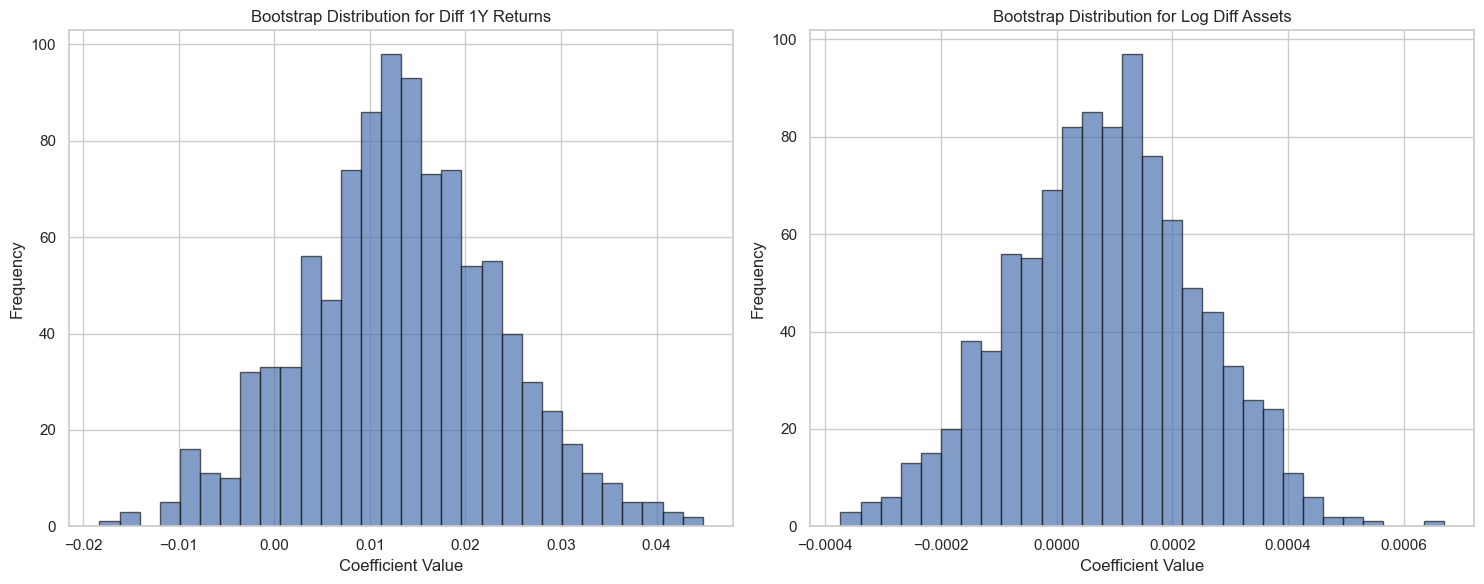

In [91]:
# 1. Fitting the primary model
X_columns = ['Log Diff Assets', 'Diff 1Y Returns', 'Is Actual Merger'] + [col for col in df if col.startswith('Year_')]
X = df[X_columns]
X = sm.add_constant(X)
y = df['Propensity Score']

primary_model = sm.OLS(y, X).fit()

# Get residuals and fitted values from the primary model
residuals = primary_model.resid
fitted_values = primary_model.fittedvalues

# 2. & 3. Bootstrap Resampling & Storing Coefficients
num_iterations = 1000
bootstrap_coefs = np.zeros((num_iterations, len(X_columns) + 1))

for i in range(num_iterations):
    # Sample residuals with replacement
    bootstrap_residuals = np.random.choice(residuals, size=len(residuals), replace=True)
    
    # Create a "new" response variable
    y_star = fitted_values + bootstrap_residuals
    
    # Fit the regression model using the "new" response
    bootstrap_model = sm.OLS(y_star, X).fit()
    bootstrap_coefs[i, :] = bootstrap_model.params.values

# 4. Analysis
# For simplicity, let's look at the coefficient of 'Diff 1Y Returns'
coefs_diff1YR = bootstrap_coefs[:, X_columns.index('Diff 1Y Returns') + 1]  # +1 accounts for the constant term

coefs_LogDiffAssets = bootstrap_coefs[:, X_columns.index('Log Diff Assets') + 1]

#Plot histograms for both coefficients side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# 'Diff 1Y Returns'
ax[0].hist(coefs_diff1YR, bins=30, edgecolor='k', alpha=0.7)
ax[0].set_xlabel('Coefficient Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Bootstrap Distribution for Diff 1Y Returns')
ax[0].grid(True)

# 'Log Diff Assets'
ax[1].hist(coefs_LogDiffAssets, bins=30, edgecolor='k', alpha=0.7)
ax[1].set_xlabel('Coefficient Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Bootstrap Distribution for Log Diff Assets')
ax[1].grid(True)


# 3. Print the confidence intervals for both coefficients
alpha = 0.05
# Confidence Interval for 'Diff 1Y Returns'
lower_bound_diff1YR = np.percentile(coefs_diff1YR, 100 * alpha / 2)
upper_bound_diff1YR = np.percentile(coefs_diff1YR, 100 * (1 - alpha / 2))
print(f"{(1-alpha)*100}% Confidence Interval for 'Diff 1Y Returns' coefficient: ({lower_bound_diff1YR}, {upper_bound_diff1YR})")

# Confidence Interval for 'Log Diff Assets'
lower_bound_LogDiffAssets = np.percentile(coefs_LogDiffAssets, 100 * alpha / 2)
upper_bound_LogDiffAssets = np.percentile(coefs_LogDiffAssets, 100 * (1 - alpha / 2))
print(f"{(1-alpha)*100}% Confidence Interval for 'Log Diff Assets' coefficient: ({lower_bound_LogDiffAssets}, {upper_bound_LogDiffAssets})")

plt.tight_layout()
plt.savefig('bootstrap_distributions.pdf', format='pdf', bbox_inches='tight')  # Saves the figure as a PDF
plt.show()

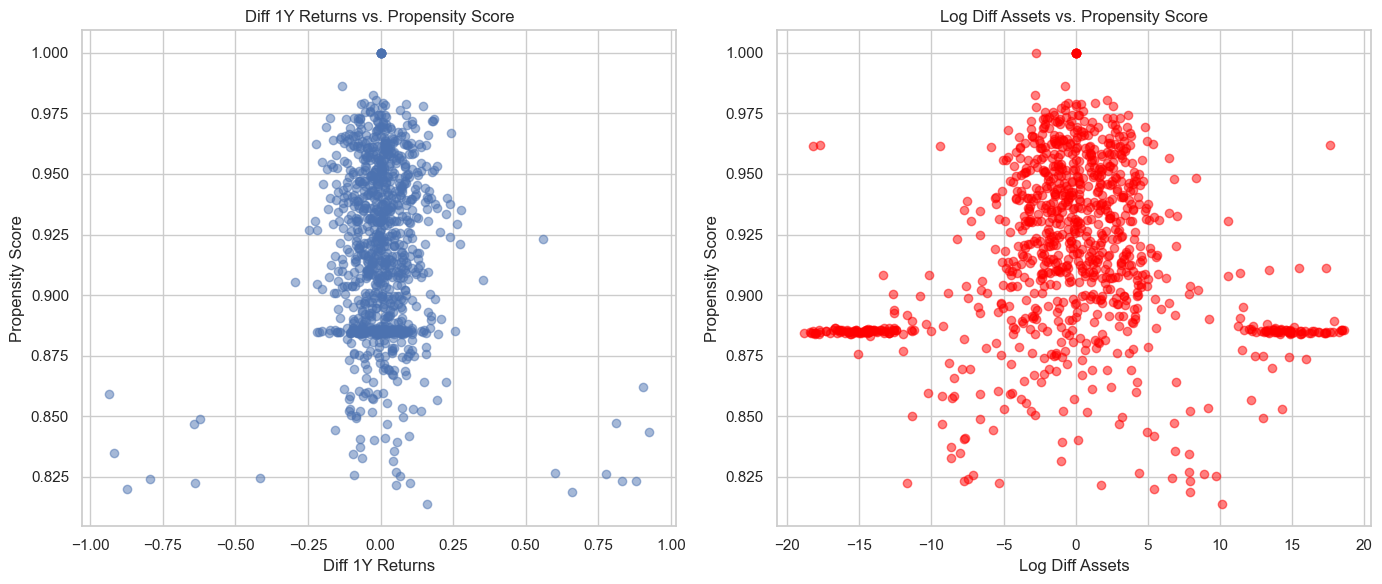

In [36]:
# Data setup
y_values = df['Propensity Score']
x1_values = df['Diff 1Y Returns']
x2_values = df['Log Diff Assets']

# Setting up the figure and axis
fig, ax = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 columns

# Plot for Diff 1Y Returns
ax[0].scatter(x1_values, y_values, alpha=0.5)
ax[0].set_title('Diff 1Y Returns vs. Propensity Score')
ax[0].set_xlabel('Diff 1Y Returns')
ax[0].set_ylabel('Propensity Score')
ax[0].grid(True)

# Plot for Log Diff Assets
ax[1].scatter(x2_values, y_values, alpha=0.5, color='red')
ax[1].set_title('Log Diff Assets vs. Propensity Score')
ax[1].set_xlabel('Log Diff Assets')
ax[1].set_ylabel('Propensity Score')
ax[1].grid(True)

# Show the plots
plt.tight_layout() # Adjusts the spacing between the plots
plt.show()


/var/folders/1p/89s8czgd3m7f_535cwnrk58c0000gn/T/ipykernel_61899/2083422014.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Propensity Score'], kde=True, bins=30, color='skyblue')


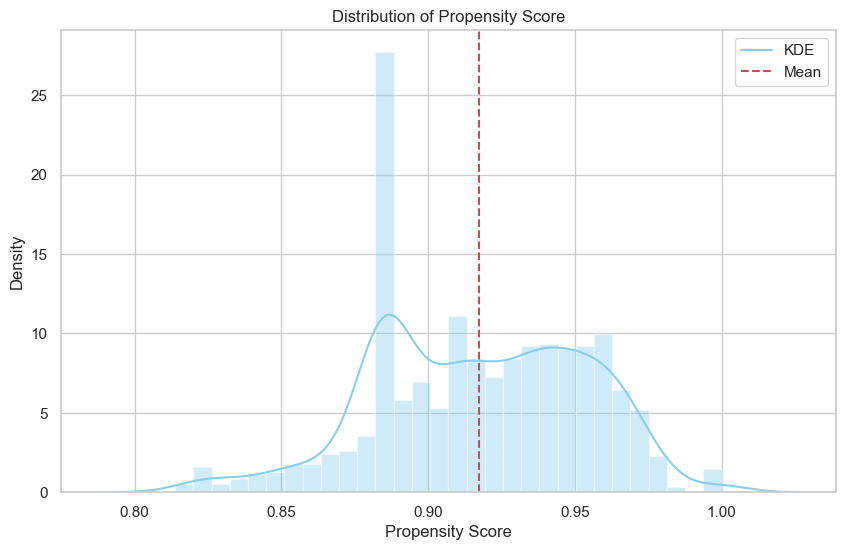

In [37]:
sns.set(style="whitegrid")

# Draw a histogram and fit a kernel density estimate (KDE)
plt.figure(figsize=(10, 6))
sns.distplot(df['Propensity Score'], kde=True, bins=30, color='skyblue')

# Plot a vertical line for the mean of the Propensity Score
plt.axvline(df['Propensity Score'].mean(), color='r', linestyle='--')

plt.title('Distribution of Propensity Score')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend({'KDE':df['Propensity Score'], 'Mean':df['Propensity Score'].mean()})
plt.show()

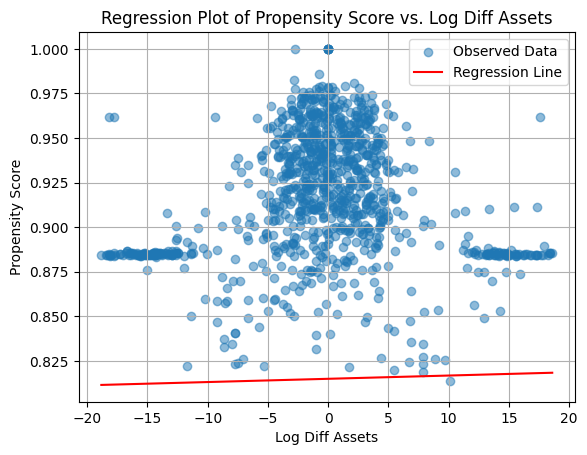

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Extract observed data points
x_observed = df['Log Diff Assets']
y_observed = df['Propensity Score']

# Calculate predicted values using the regression coefficients
x_sorted = np.sort(x_observed)
y_predicted = model.params['const'] + model.params['Log Diff Assets'] * x_sorted

# Plot the observed data
plt.scatter(x_observed, y_observed, label='Observed Data', alpha=0.5)

# Plot the regression line
plt.plot(x_sorted, y_predicted, color='red', label='Regression Line')

# Labeling the plot
plt.xlabel('Log Diff Assets')
plt.ylabel('Propensity Score')
plt.title('Regression Plot of Propensity Score vs. Log Diff Assets')
plt.legend()
plt.grid(True)
plt.show()


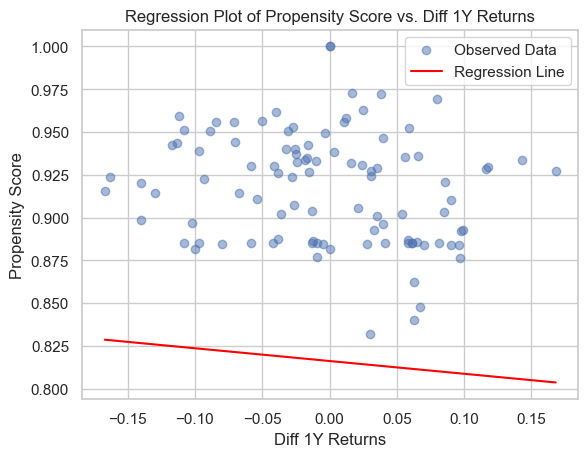

In [404]:
import matplotlib.pyplot as plt
import numpy as np

# Extract observed data points
x_observed = df['Diff 1Y Returns']
y_observed = df['Propensity Score']

# Calculate predicted values using the regression coefficients
x_sorted = np.sort(x_observed)
y_predicted = model.params['const'] + model.params['Diff 1Y Returns'] * x_sorted

# Plot the observed data
plt.scatter(x_observed, y_observed, label='Observed Data', alpha=0.5)

# Plot the regression line
plt.plot(x_sorted, y_predicted, color='red', label='Regression Line')

# Labeling the plot
plt.xlabel('Diff 1Y Returns')
plt.ylabel('Propensity Score')
plt.title('Regression Plot of Propensity Score vs. Diff 1Y Returns')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
variables_of_interest = ['Log Diff Assets', 'Diff 1Y Returns', 'Propensity Score',]

summary_statistics = df[variables_of_interest].describe()
print(summary_statistics)

       Log Diff Assets  Diff 1Y Returns  Propensity Score
count      1000.000000      1000.000000       1000.000000
mean         -0.352688         0.000112          0.917353
std           7.076867         0.130003          0.035760
min         -18.830771        -0.934000          0.813846
25%          -3.036797        -0.059000          0.885769
50%          -0.234686        -0.000500          0.916923
75%           2.812645         0.051000          0.946250
max          18.605586         0.926000          1.000000


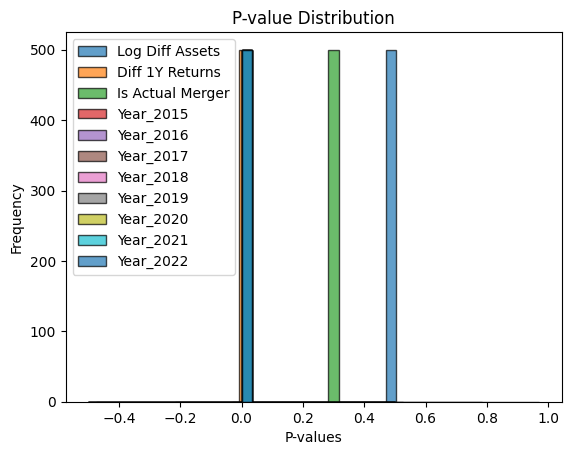

In [355]:
# Convert list of p-values to a DataFrame
p_values_df = pd.DataFrame(p_values_list)

# Plot the p-value distribution for each variable
for column in X_columns:
    plt.hist(p_values_df[column], bins=30, edgecolor='k', alpha=0.7, label=column)

plt.xlabel('P-values')
plt.ylabel('Frequency')
plt.title('P-value Distribution')
plt.legend()
plt.show()

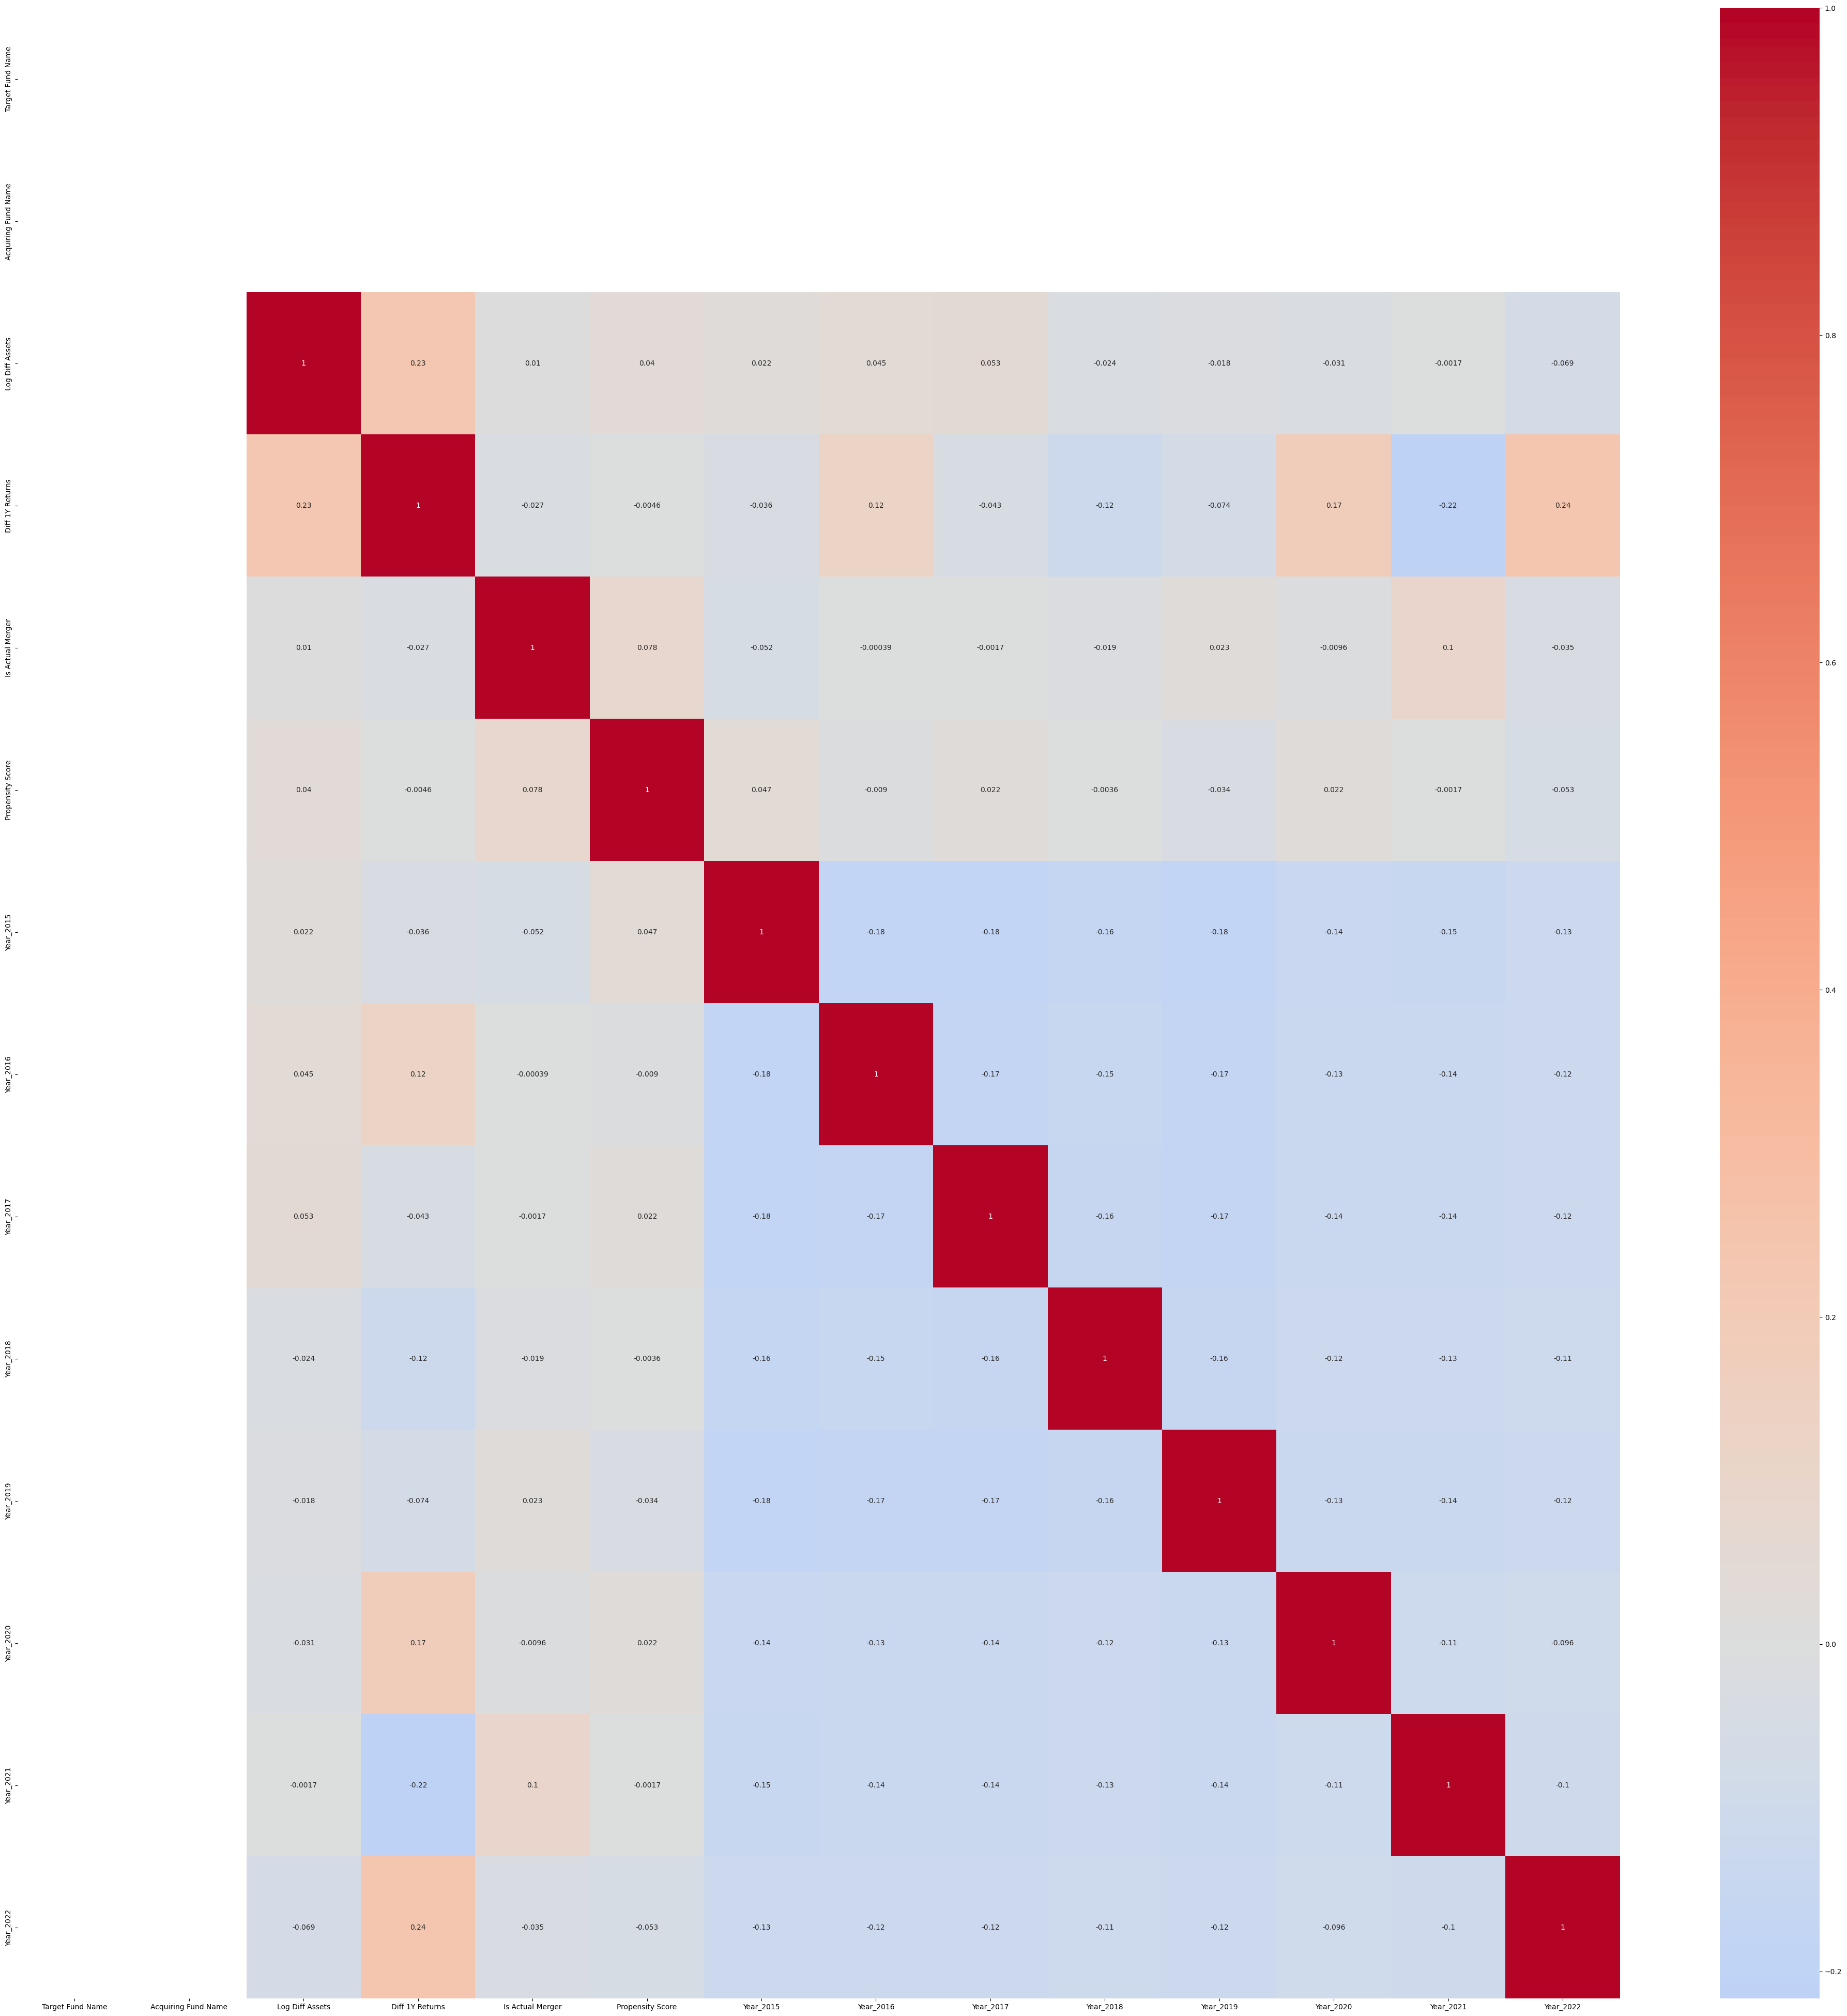

In [29]:
# Assuming final_merged_result is your DataFrame
correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

## Not controlling for year

In [179]:
import statsmodels.api as sm

# Columns to consider for the propensity score
columns_to_consider = [
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%',
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%', '<$1,000%',
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%',
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%',
    '$1,000,000+%', 'Proportion of investments in cash',
    'Proportion of investments in  fixed income', 'Proportion of investments in equity',
    'Proportion of investments in property', 'Proportion of investments in infrastructure',
    'Proportion of investments in commodities', 'Proportion of investments in other'
]

column_weights = {
    '<25%': 1,
    '25 to 34%': 1,
    '35 to 44%': 1,
    '45 to 49%': 1,
    '50 to 54%': 1,
    '55 to 59%': 1,
    '60 to 64%': 1,
    '65 to 69%': 1,
    '70 to 74%': 1,
    '75 to 84%': 1,
    '85+%': 1,
    '<$1,000%': 1,
    '$1,000 to $24,999%': 1,
    '$25,000 to $49,000%': 1,
    '$50,000 to $99,999%': 1,
    '$100,000 to $199,999%': 1,
    '$200,000 to $499,999%': 1,
    '$500,000 to $999,999%': 1,
    '$1,000,000+%': 1,
    'Proportion of investments in cash': 1,
    'Proportion of investments in  fixed income': 1,
    'Proportion of investments in equity': 1,
    'Proportion of investments in property': 1,
    'Proportion of investments in infrastructure': 1,
    'Proportion of investments in commodities': 1,
    'Proportion of investments in other':1,
}

# Define the propensity score calculation function
def calculate_propensity_score(target, acquirer, columns, weights):
    weighted_diff_sum = sum(weights[col] * abs(target[col] - acquirer[col]) for col in columns)
    weight_sum = sum(weights.values())
    return 1 - (weighted_diff_sum / weight_sum)

# Initialize a list to store data for regression
data_list = []

# Loop for 1000 bootstrapped samples
for _ in range(100):
    # Randomly sample target and acquiring firms from propensity
    target_firm_propensity = propensity.sample(n=1).iloc[0]
    acquirer_firm_propensity = propensity.sample(n=1).iloc[0]
    
    # Get corresponding rows from merged_fund_profile and merged_financial
    target_firm_profile = merged_fund_profile[merged_fund_profile['Fund name'] == target_firm_propensity['Fund name']]
    acquirer_firm_profile = merged_fund_profile[merged_fund_profile['Fund name'] == acquirer_firm_propensity['Fund name']]
    
    target_firm_financial = merged_financial[merged_financial['Fund name'] == target_firm_propensity['Fund name']]
    acquirer_firm_financial = merged_financial[merged_financial['Fund name'] == acquirer_firm_propensity['Fund name']]
    
    # Check if it's an actual merger
    is_actual_merger = 0  # Default to 0

    # Check if the target firm has 'Merged' set to 1
    if target_firm_propensity['Merged'] == 1:
        # Identify the next period (t+1) for the target firm
        next_period = target_firm_propensity['Period'] + pd.DateOffset(years=1)
    
        # Check if there's a corresponding acquirer in the next period with 'Merger' set to 1
        matching_acquirer = propensity[
            (propensity['Period'] == next_period) & 
            (propensity['Fund name'] == target_firm_propensity['Acquirer']) & 
            (propensity['Merger'] == 1)
        ]
    
        is_actual_merger = 1
        
        # Calculate the propensity score
    score = calculate_propensity_score(target_firm_propensity, acquirer_firm_propensity, columns_to_consider, column_weights)
    
    # Calculate the log difference of total assets using merged_fund_profile data
    log_diff_assets = np.log(acquirer_firm_profile['TtlAst'] + 1) - np.log(target_firm_profile['TtlAst'] + 1)

    # Calculate the difference in 1-year returns
    diff_1YrRet = target_firm_financial['1YrRet'] - acquirer_firm_financial['1YrRet']

    # Append to data list
    data_list.append({
        'PropensityScore': score,
        'Diff1YrRet': diff_1YrRet,
        'LogDiffAssets': log_diff_assets,
        'ActualMerger': is_actual_merger
    })

# Convert data list to DataFrame
df = pd.DataFrame(data_list)

# Convert the columns to numeric data type and fill NaN values
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Run the regression
X = df.drop(columns=['PropensityScore'])
X = sm.add_constant(X)
y = df['PropensityScore']
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        PropensityScore   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.957
Date:                Mon, 09 Oct 2023   Prob (F-statistic):              0.165
Time:                        10:41:16   Log-Likelihood:                 189.33
No. Observations:                 100   AIC:                            -374.7
Df Residuals:                      98   BIC:                            -369.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9156      0.004    247.517

/Users/marlonferguson/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [191]:
import pandas as pd
from itertools import product

# ... [Your previous code for importing libraries, defining columns_to_consider, column_weights, and calculate_propensity_score function]

# Initialize a list to store data for regression
data_list = []

# Get unique periods from the propensity dataframe
unique_periods = propensity['Period'].unique()

# Loop through each unique period
for period in unique_periods:
    # Filter the propensity dataframe for the current period
    current_period_df = propensity[propensity['Period'] == period]
    
    # Loop through every possible combination of target and acquirer for the current period
    for target_firm_propensity, acquirer_firm_propensity in product(current_period_df.iterrows(), repeat=2):
        target_firm_propensity = target_firm_propensity[1]
        acquirer_firm_propensity = acquirer_firm_propensity[1]
        
        # Skip if target and acquirer are the same
        if target_firm_propensity['Fund name'] == acquirer_firm_propensity['Fund name']:
            continue
        
        # Calculate the propensity score
        score = calculate_propensity_score(target_firm_propensity, acquirer_firm_propensity, columns_to_consider, column_weights)
        
        # Check if it's an actual merger
        is_actual_merger = 0  # Default to 0
        next_period = period + pd.DateOffset(years=1)
        if target_firm_propensity['Merged'] == 1 and target_firm_propensity['Acquirer'] == acquirer_firm_propensity['Fund name']:
            matching_acquirer = propensity[
                (propensity['Period'] == next_period) & 
                (propensity['Fund name'] == acquirer_firm_propensity['Fund name']) & 
                (propensity['Merger'] == 1)
            ]
            if not matching_acquirer.empty:
                is_actual_merger = 1
        
        # Calculate the log difference of total assets
        log_diff_assets = np.log(acquirer_firm_profile['TtlAst'].iloc[0] + 1) - np.log(target_firm_profile['TtlAst'].iloc[0] + 1)

        # Calculate the difference in 1-year returns
        diff_1YrRet = target_firm_financial['1YrRet'].iloc[0] - acquirer_firm_financial['1YrRet'].iloc[0]

        # Append to data list
        data_list.append({
            'PropensityScore': score,
            'Diff1YrRet': diff_1YrRet,
            'LogDiffAssets': log_diff_assets,
            'ActualMerger': is_actual_merger
        })

# Convert data list to DataFrame
df = pd.DataFrame(data_list)

# Convert the columns to numeric data type and fill NaN values
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Run the regression
X = df[['ActualMerger', 'Diff1YrRet', 'LogDiffAssets']]
X = sm.add_constant(X)
y = df['PropensityScore']
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        PropensityScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     29.88
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.60e-08
Time:                        11:08:43   Log-Likelihood:             4.9419e+05
No. Observations:              264212   AIC:                        -9.884e+05
Df Residuals:                  264210   BIC:                        -9.883e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ActualMerger      0.0425      0.008      5.466

In [190]:
df

,Target,Acquirer,PropensityScore,ActualMerger
0,0.0,0.0,0.924231,0
1,0.0,0.0,0.923077,0
2,0.0,0.0,0.940385,0
3,0.0,0.0,0.924615,0
4,0.0,0.0,0.936154,0
...,...,...,...,...
264207,0.0,0.0,0.941154,0
264208,0.0,0.0,0.940769,0
264209,0.0,0.0,0.938846,0
264210,0.0,0.0,0.953462,0


In [194]:
data_list = []

# Get unique periods from the propensity dataframe
unique_periods = propensity['Period'].unique()

# Loop through each unique period
for period in unique_periods:
    # Filter the propensity dataframe for the current period
    current_period_df = propensity[propensity['Period'] == period]
    
    # Loop through every possible combination of target and acquirer for the current period
    for target_firm_propensity, acquirer_firm_propensity in product(current_period_df.iterrows(), repeat=2):
        target_firm_propensity = target_firm_propensity[1]
        acquirer_firm_propensity = acquirer_firm_propensity[1]
        
        # Skip if target and acquirer are the same
        if target_firm_propensity['Fund name'] == acquirer_firm_propensity['Fund name']:
            continue
        
        # Calculate the propensity score
        score = calculate_propensity_score(target_firm_propensity, acquirer_firm_propensity, columns_to_consider, column_weights)
        
        # Check if it's an actual merger
        is_actual_merger = 0  # Default to 0
        next_period = period + pd.DateOffset(years=1)
        if target_firm_propensity['Merged'] == 1 and target_firm_propensity['Acquirer'] == acquirer_firm_propensity['Fund name']:
            matching_acquirer = propensity[
                (propensity['Period'] == next_period) & 
                (propensity['Fund name'] == acquirer_firm_propensity['Fund name']) & 
                (propensity['Merger'] == 1)
            ]
            if not matching_acquirer.empty:
                is_actual_merger = 1

        # Calculate the log difference of total assets
        log_diff_assets = np.log(acquirer_firm_profile['TtlAst'].iloc[0] + 1) - np.log(target_firm_profile['TtlAst'].iloc[0] + 1)

        # Calculate the difference in 1-year returns
        diff_1YrRet = target_firm_financial['1YrRet'].iloc[0] - acquirer_firm_financial['1YrRet'].iloc[0]

        # Append to data list
        data_list.append({
            'Year': pd.Timestamp(period).year,
            'PropensityScore': score,
            'Diff1YrRet': diff_1YrRet,
            'LogDiffAssets': log_diff_assets,
            'ActualMerger': is_actual_merger
        })

# Convert data list to DataFrame
df = pd.DataFrame(data_list)

# Convert the columns to numeric data type and fill NaN values
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Create dummy variables for years
year_dummies = pd.get_dummies(df['Year'], drop_first=True, prefix='Year')

# Add the dummy variables to the dataframe
df = pd.concat([df, year_dummies], axis=1)

# Drop the original 'Year' column
df = df.drop(columns=['Year'])

# Run the regression
X = df.drop(columns=['PropensityScore'])
X = sm.add_constant(X)
y = df['PropensityScore']
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        PropensityScore   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     54.56
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           3.48e-89
Time:                        11:16:15   Log-Likelihood:             4.9439e+05
No. Observations:              264212   AIC:                        -9.888e+05
Df Residuals:                  264203   BIC:                        -9.887e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Diff1YrRet       -0.0013   2.24e-07  -5682.124

## Logit Model

In [195]:
# Specify the independent variables and the dependent variable
X = df[['PropensityScore', 'Diff1YrRet', 'LogDiffAssets'] + [col for col in df.columns if col.startswith('Year_')]]
X = sm.add_constant(X)  # Add a constant to the model
y = df['ActualMerger']

# Run the logit regression
logit_model = sm.Logit(y, X).fit()

# Display the regression results
print(logit_model.summary())


         Current function value: 0.000807
         Iterations: 35


/Users/marlonferguson/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:           ActualMerger   No. Observations:               264212
Model:                          Logit   Df Residuals:                   264202
Method:                           MLE   Df Model:                            9
Date:                Mon, 09 Oct 2023   Pseudo R-squ.:                  0.1042
Time:                        11:20:12   Log-Likelihood:                -213.23
converged:                      False   LL-Null:                       -238.03
Covariance Type:            nonrobust   LLR p-value:                 1.289e-07
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
PropensityScore    37.2560      7.334      5.080      0.000      22.881      51.631
Diff1YrRet          0.0638        nan        nan        nan         nan         nan
LogDiffAssets     -38.2468      

## Sumamry Statistics

In [210]:
variables_of_interest = columns_to_consider

summary_statistics = propensity[variables_of_interest].describe()
print(summary_statistics)

              <25%    25 to 34%    35 to 44%    45 to 49%    50 to 54%  \
count  1427.000000  1427.000000  1427.000000  1427.000000  1427.000000   
mean      0.009222     0.057176     0.125312     0.089727     0.103938   
std       0.037267     0.071238     0.103840     0.061980     0.069303   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.020000     0.030000     0.050000   
50%       0.000000     0.040000     0.120000     0.110000     0.120000   
75%       0.010000     0.080000     0.200000     0.140000     0.150000   
max       0.470000     0.420000     0.480000     0.290000     0.410000   

         55 to 59%    60 to 64%    65 to 69%    70 to 74%    75 to 84%  ...  \
count  1427.000000  1427.000000  1427.000000  1427.000000  1427.000000  ...   
mean      0.119881     0.114996     0.084464     0.052733     0.038283  ...   
std       0.077276     0.081130     0.075333     0.064017     0.071862  ...   
min       0.00000

In [211]:
summary_statistics.to_csv('summary_statistics.csv')

In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Columns to consider for the propensity score
columns_to_consider = [
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%',
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%', '<$1,000%',
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%',
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%',
    '$1,000,000+%', 'Proportion of investments in cash',
    'Proportion of investments in  fixed income', 'Proportion of investments in equity',
    'Proportion of investments in property', 'Proportion of investments in infrastructure',
    'Proportion of investments in commodities', 'Proportion of investments in other'
]

column_weights = {
    '<25%': 1,
    '25 to 34%': 1,
    '35 to 44%': 1,
    '45 to 49%': 1,
    '50 to 54%': 1,
    '55 to 59%': 1,
    '60 to 64%': 1,
    '65 to 69%': 1,
    '70 to 74%': 1,
    '75 to 84%': 1,
    '85+%': 1,
    '<$1,000%': 1,
    '$1,000 to $24,999%': 1,
    '$25,000 to $49,000%': 1,
    '$50,000 to $99,999%': 1,
    '$100,000 to $199,999%': 1,
    '$200,000 to $499,999%': 1,
    '$500,000 to $999,999%': 1,
    '$1,000,000+%': 1,
    'Proportion of investments in cash': 1,
    'Proportion of investments in  fixed income': 1,
    'Proportion of investments in equity': 1,
    'Proportion of investments in property': 1,
    'Proportion of investments in infrastructure': 1,
    'Proportion of investments in commodities': 1,
    'Proportion of investments in other':1,
}

# Define the propensity score calculation function
def calculate_propensity_score(target, acquirer, columns, weights):
    weighted_diff_sum = sum(weights[col] * abs(target[col] - acquirer[col]) for col in columns)
    weight_sum = sum(weights.values())
    return 1 - (weighted_diff_sum / weight_sum)

# Function to calculate log difference of assets
def log_diff_assets(target, acquirer):
    return np.log(acquirer['TtlAst'] + 1) - np.log(target['TtlAst'] + 1)

# Function to calculate difference in 1-year returns
def diff_1y_returns(target, acquirer):
    return acquirer['1YrRet'] - target['1YrRet']

# Initialize a list to store data for regression
bootstrap_data_list = []

# Initialize a list to store data for all possible pairs
all_pairs_data_list = []

# Loop for 1000 bootstrapped samples
for _ in range(1000):
    # Randomly sample target and acquiring firms from final_merged_result
    sampled_rows = final_merged_result.sample(n=2)
    target_firm = sampled_rows.iloc[0]
    acquirer_firm = sampled_rows.iloc[1]
    
    # Calculate the propensity score
    score = calculate_propensity_score(target_firm, acquirer_firm, columns_to_consider, column_weights)
    
    log_diff = log_diff_assets(target_firm, acquirer_firm)
    diff_returns = diff_1y_returns(target_firm, acquirer_firm)
    
    # Append data to the list
    bootstrap_data_list.append({
        'Log Diff Assets': log_diff,
        'Diff 1Y Returns': diff_returns,
        'Propensity Score': score
    })

# Calculate propensity score, differences in 1-year returns, and log differences of assets for all pairs
for i in range(len(final_merged_result)):
    for j in range(len(final_merged_result)):
        if i != j:
            target_firm = final_merged_result.iloc[i]
            acquirer_firm = final_merged_result.iloc[j]
            
            score = calculate_propensity_score(target_firm, acquirer_firm, columns_to_consider, column_weights)
            log_diff = log_diff_assets(target_firm, acquirer_firm)
            diff_returns = diff_1y_returns(target_firm, acquirer_firm)
            
            all_pairs_data_list.append({
                'Target Fund Name': target_firm['Fund name'],
                'Acquiring Fund Name': acquirer_firm['Fund name'],
                'Log Diff Assets': log_diff,
                'Diff 1Y Returns': diff_returns,
                'Propensity Score': score
            })

# Convert data lists to DataFrames
bootstrap_df = pd.DataFrame(bootstrap_data_list)
all_pairs_df = pd.DataFrame(all_pairs_data_list)

# Provide summary statistics
bootstrap_summary_stats = bootstrap_df.describe()
all_pairs_summary_stats = all_pairs_df.describe()

print("Bootstrap Sample Summary Statistics:")
print(bootstrap_summary_stats)
print("\nAll Possible Pairs Summary Statistics:")
print(all_pairs_summary_stats)


Bootstrap Sample Summary Statistics:
       Log Diff Assets  Diff 1Y Returns  Propensity Score
count      1000.000000      1000.000000       1000.000000
mean          0.491674         0.000127          0.916947
std           7.021880         0.139367          0.038096
min         -18.263943        -1.567000          0.799615
25%          -2.373546        -0.050000          0.885385
50%           0.011916         0.003000          0.917692
75%           2.863947         0.058000          0.947308
max          18.792875         0.889000          1.000000

All Possible Pairs Summary Statistics:
       Log Diff Assets  Diff 1Y Returns  Propensity Score
count     1.665390e+06     1.665390e+06      1.665390e+06
mean      3.172929e-16    -1.023966e-18      9.168756e-01
std       7.170458e+00     1.232066e-01      3.643504e-02
min      -1.942039e+01    -1.745000e+00      7.800000e-01
25%      -2.811251e+00    -5.800000e-02      8.853846e-01
50%       0.000000e+00     0.000000e+00      9.173077